In [445]:
import numpy as np
import cv2
import scipy
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

#### 10. (5 баллов) Шахматная доска 8х8 клеток имеет длину клетки 0.2. Начало мировой системы координат находится в левом нижнем углу, оси X и Y направлены вдоль сторон клеток, ось Z перпендикулярна плоскости доски. Используя внутренние параметры и положение камеры относительно мировой системы координат из задачи 6 (второе домашнее задание), и предполагая отсутствие дисторсии, найти координаты проекций углов клеток на плоскость изображения. Затем решить задачу PnP, используя функцию cv2.solvePnPGeneric, для трехмерных координат клеток в мировой системе координат и найденных двумерных проекций. Сравнить полученные поворот и трансляцию с взятыми из задачи 6. Если результаты получаются неожиданными, объяснить.


In [446]:
camera_matrix = np.array([[1000., 0., 400.], [0., 1000., 300.], [
                         0., 0., 1.]], dtype=np.float32)

rotation_vector = np.array([[0., 0., np.pi / 4]],
                           dtype=np.float32)  # вектор поворота
translation_vector = np.array([[0.], [0.], [10.]], dtype=np.float32)

chessboard_corners_3d = np.zeros((64, 3), np.float32)
for i in range(8):
    for j in range(8):
        chessboard_corners_3d[i * 8 + j] = [i * 0.2, j * 0.2, 0]

image_points, _ = cv2.projectPoints(
    chessboard_corners_3d, rotation_vector, translation_vector, camera_matrix, None
)

image_points = image_points.reshape((64, 2))

In [447]:
retval, rvec, tvec, _ = cv2.solvePnPGeneric(
    objectPoints=chessboard_corners_3d,
    imagePoints=image_points,
    cameraMatrix=camera_matrix,
    distCoeffs=None,
    flags=cv2.SOLVEPNP_ITERATIVE,
)

print("Rotation vector:", rvec)
print("Translation vector:", tvec)
print(np.allclose(tvec, translation_vector, atol=0.00001))

Rotation vector: (array([[2.79494017e-07],
       [4.22563255e-07],
       [7.85398175e-01]]),)
Translation vector: (array([[-6.07763972e-08],
       [ 2.00970782e-08],
       [ 9.99999973e+00]]),)
True


#### 11. (15 баллов, необязательно) Найти внутренние параметры камеры и параметры дисторсии по изображениям из архива https://drive.google.com/file/d/1m6qNqSkZYLZW9YD89zsHIgEgbjWRM-vN/view?usp=sharing. Можно использовать сэмпл example_cpp_calibration из OpenCV


#### 12. (5 баллов) Используя матрицу внутренних параметров https://drive.google.com/file/d/1A4H84PLy7971Xd1ErS1bRRupWk9_TCYI/view?usp=sharing, запустить функцию cv2.undistort() на изображении https://drive.google.com/file/d/1mC0PI9k4q_wJt9iAn6uosEVSJb9PcZIk/view?usp=sharing, и записать в файл изображение с компенсацией искажений линзы.


<>:26: SyntaxWarning: invalid escape sequence '\G'
<>:26: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Yohan\AppData\Local\Temp\ipykernel_24240\3908882332.py:26: SyntaxWarning: invalid escape sequence '\G'
  img = cv2.imread("images\GOPR01170000.jpg")


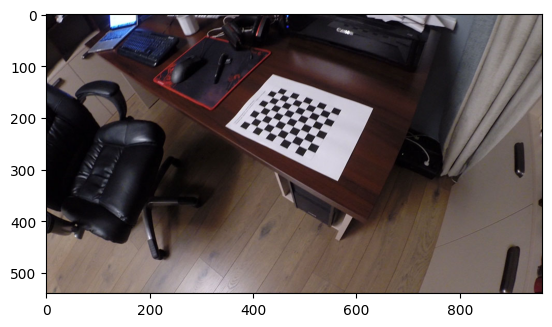

In [448]:
K = np.array(
    [
        [4.2581151397691417e02, 0.0, 4.8175802555527360e02],
        [0.0, 4.3533255745518812e02, 2.6743704185634374e02],
        [0.0, 0.0, 1.0],
    ]
)
D = np.array(
    [
        4.4429001834994422e00,
        2.7649030467662392e00,
        -4.5203901289078106e-03,
        -1.8217805324766470e-03,
        0.0,
        4.7056576535214534e00,
        3.9343291290497260e00,
        3.3910745370687528e-01,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ]
)
img = cv2.imread("images\GOPR01170000.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

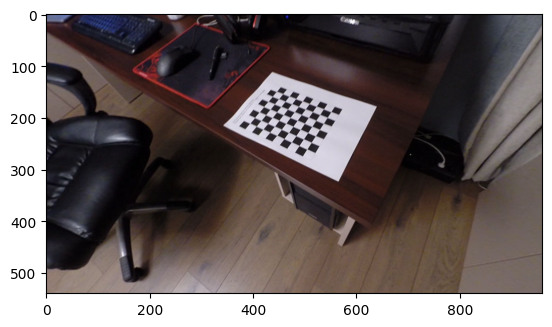

In [449]:
undistort = cv2.undistort(img, K, D)
cv2.imwrite("images\\undistort.jpg", undistort)
plt.imshow(cv2.cvtColor(undistort, cv2.COLOR_BGR2RGB))

#### 13. (5 баллов) Первая камера повернута относительно второй на 45 градусов по оси z и сдвинута на 10 вдоль направления оси x второй камеры. У обеих камер матрицы внутренних параметров единичные. Найти и распечатать фундаментальную матрицу.

In [450]:
K1, K2 = np.eye(3), np.eye(3)

R1 = np.array(
    [

        [np.cos(np.pi / 4), -np.sin(np.pi / 4), 0],
        [np.sin(np.pi / 4), np.cos(np.pi / 4), 0],
        [0, 0, 1],
    ]
)
R2 = np.eye(3)

T1 = np.array([[10], [0], [0]])
T2 = np.array([[0], [0], [0]])

P1 = np.hstack((R1, T1))
P2 = np.hstack((R2, T2))

In [451]:
C = np.array([[0.0], [0.0], [0.0], [1.0]])
P2 @ C

array([[0.],
       [0.],
       [0.]])

In [452]:
e2 = P1 @ C
e2

array([[10.],
       [ 0.],
       [ 0.]])

In [453]:
arr = np.linalg.inv(K2)
P = np.insert(arr, 3, np.array([0, 0, 0]), axis=0)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [454]:
T2x, T2y, T2z = e2.T[0]
T2_crest = np.array([[0, -T2z, T2y], [T2z, 0, -T2x], [-T2y, T2x, 0]])
T2_crest

array([[  0.,  -0.,   0.],
       [  0.,   0., -10.],
       [ -0.,  10.,   0.]])

In [455]:
F = T2_crest@P1@P

In [456]:
def is_fundamental_matrix(
    F,
    K1: np.array,
    K2: np.array,
    R1: np.array,
    R2: np.array,
    T1: np.array,
    T2: np.array,
    iter: int = 5,
    max_int: int = 5,
):
    P1 = np.dot(K1, np.insert(R1, 3, T1, axis=1))
    P2 = np.dot(K2, np.insert(R2, 3, T2, axis=1))
    for i in range(iter):
        X = np.array(
            [
                np.random.randint(1, max_int),
                np.random.randint(1, max_int),
                np.random.randint(1, max_int),
            ]
        )
        x1 = np.dot(P1, np.insert(X, 3, 1, axis=0))
        x2 = np.dot(P2, np.insert(X, 3, 1, axis=0))
        x1 = x1 / x1[2]
        x2 = x2 / x2[2]
        is_zero = np.dot(x2.T, np.dot(F, x1))
        if not np.allclose(is_zero, 0):
            return False
    return True

In [457]:
print(F.T@e2)
is_fundamental_matrix(F, K2, K1, R2, R1, T2.T, T1.T)

[[0.]
 [0.]
 [0.]]


True

In [458]:
print("Fundamental matrix:")
print(F)

Fundamental matrix:
[[  0.           0.           0.        ]
 [  0.           0.         -10.        ]
 [  7.07106781   7.07106781   0.        ]]


#### 14. (5 баллов) Первая камера повернута относительно мировой системы координат на 45 градусов по оси z, а вторая – на -45 градусов по оси у и сдвинута на 10 в направлении оси x. У обеих камер матрицы внутренних параметров единичные. Найти и распечатать фундаментальную матрицу.


In [459]:
K1, K2 = np.eye(3), np.eye(3)

R1 = np.array(
    [
        [np.cos(np.pi / 4), -np.sin(np.pi / 4), 0],
        [np.sin(np.pi / 4), np.cos(np.pi / 4), 0],
        [0, 0, 1],
    ]
)
R2 = np.array(
    [
        [np.cos(np.pi / 4), 0, -np.sin(np.pi / 4)],
        [0, 1, 0],
        [np.sin(np.pi / 4), 0, np.cos(np.pi / 4)],
    ]
)

T1 = np.array([[0], [0], [0]])
T2 = np.array([[10], [0], [0]])

P1 = np.hstack((R1, T1))
P2 = np.hstack((R2, T2))

In [460]:
C = np.array([[0.0], [0.0], [0.0], [1.0]])
P1 @ C

array([[0.],
       [0.],
       [0.]])

In [461]:
e2 = P2 @ C
e2

array([[10.],
       [ 0.],
       [ 0.]])

In [462]:
P = np.insert(np.linalg.inv(K2), 3, np.array([0, 0, 0]), axis=0)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [463]:
T2x, T2y, T2z = e2.T[0]
T2_crest = np.array([[0, -T2z, T2y], [T2z, 0, -T2x], [-T2y, T2x, 0]])
T2_crest

array([[  0.,  -0.,   0.],
       [  0.,   0., -10.],
       [ -0.,  10.,   0.]])

In [464]:
F = np.linalg.inv(K2).T @ T2_crest @ R2 @ R1.T @ np.linalg.inv(K1)
print("Fundamental matrix:")
print(F)

Fundamental matrix:
[[ 0.          0.          0.        ]
 [-5.         -5.         -7.07106781]
 [-7.07106781  7.07106781  0.        ]]


In [465]:
print(F.T@e2)
is_fundamental_matrix(F, K1, K2, R1, R2, T1.T, T2.T)

[[0.]
 [0.]
 [0.]]


True

#### 15. В задаче 14 найти и распечатать оба эпиполя.


In [466]:
e1 = scipy.linalg.null_space(F)
F@e1

array([[ 0.0000000e+00],
       [-4.4408921e-16],
       [ 8.8817842e-16]])

In [467]:
e2 = scipy.linalg.null_space(F.T)
F.T@e2

array([[0.],
       [0.],
       [0.]])

#### 16. В задаче 14 найти и распечатать эпиполярную линию, проходящую через точку (0,0) на первом изображении, и соответствующую ей линию на втором изображении.


In [468]:
x = np.array([0, 0, 1])
l1 = np.cross(e1.T, x)
l1

array([[ 0.5, -0.5,  0. ]])

In [469]:
l2 = F@x
l2

array([ 0.        , -7.07106781,  0.        ])